## House Price Prediction using Machine Learning in Python

### **House Price Prediction Using Machine Learning in Python**

Predicting house prices is a critical challenge in the real estate sector, essential for informed decision-making by buyers, sellers, and investors. Leveraging machine learning algorithms allows us to estimate property values based on key features such as:

- Location  
- Property size  
- Number of bedrooms  
- And other relevant factors  

In this project, we'll build a predictive model in Python to uncover actionable insights into housing market trends.

We'll be using the **House Price Prediction Dataset**, which contains **13 distinct features** that describe various aspects of residential properties. 
The dataset is available via the provided download link."https://1drv.ms/x/c/3023233cb9d01f98/EdDazU54Kz1JnMIfEs0NYLEBQmXZdTCaYUpiXl1OAE6mMQ?e=QMuJcF"




### Data Collection

In [1]:
# Import Necessary Libraries - Start by importing the libraries required for data cleaning and exploration

import pandas as pd
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt       # For making plots
import seaborn as sns                 # For more visually appealing plotsimport pandas as pd


In [2]:
# Load the Dataset - Load the dataset and inspect its structure.

data = pd.read_excel("C:\\Users\\ibora\\OneDrive\\HousePricePrediction.xlsx")

In [32]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
data.shape

(2919, 13)

#### Obseravtion
We have sucessfully loaded the our data and the shape is telling us we have 2,919 rows and 13 columns.

### Data Cleaning and Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


#### Observation
The dataset contains 2,919 entries and 13 features, with mostly complete data except for slight missing values in four columns and a significant gap in 
the `SalePrice` field. The mixture of numerical and categorical variables suggests a balanced foundation for regression modeling, pending thoughtful preprocessing.


In [5]:
# Check for Missing Values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

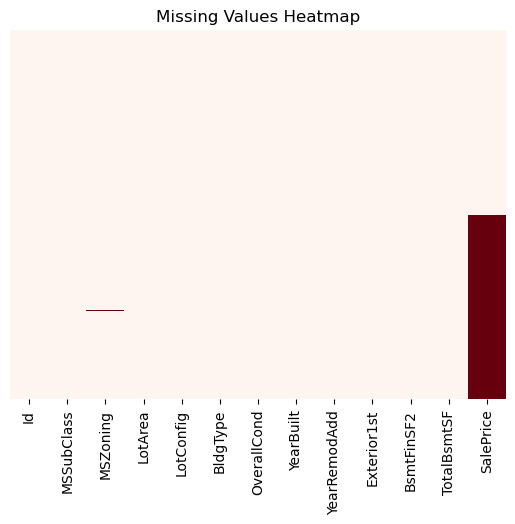

In [6]:
# Plot a heatmap of missing values
sns.heatmap(data.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

#### Observation
The dataset is largely complete with minimal missing values across most features, making it suitable for modeling. However, `SalePrice`—the target 
variable—has over 1,400 missing entries, which could significantly impact supervised learning and may require filtering or imputation strategies.


In [7]:
# Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

data['SalePrice'] = data['SalePrice'].fillna(
  data['SalePrice'].mean()) 

In [8]:
# As Id Column will not be participating in any prediction. So we can Drop it.

data.drop(['Id'],
             axis=1,
             inplace=True)

In [9]:
# Drop records with null values (as the empty records are very less).

new_dataset = data.dropna()

In [10]:
# Checking features which have null values in the new dataframe (if there are still any).

new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [11]:
# Check for Duplicated Rows

# Count total duplicate rows
duplicate_count = new_dataset.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 8


#### Observation
No duplictaes

In [12]:
# Summary Statistics of numerical columns
new_dataset.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000
mean,57.190182,10137.665980,5.566770,1971.391349,1984.314452,49.667353,1052.805012,180921.195890
std,42.538067,7832.598853,1.108977,30.258751,20.864950,169.338330,439.688510,56232.174632
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7476.000000,5.000000,1954.000000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9450.000000,5.000000,1973.000000,1993.000000,0.000000,990.000000,180921.195890
75%,70.000000,11553.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


#### Observation
The `SalePrice` field shows a mean of approximately 180,921, which we've imputed for missing values—visible in the flat 50th and 75th percentiles. 
This skews the central tendency and may dampen model sensitivity to actual price variation. Also, features like `LotArea` and `BsmtFinSF2` display wide 
ranges and standard deviations, indicating potential influence on price but also a need for normalization or transformation.


### Exploratory Data analysis (EDA)

In [13]:
# Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

obj = (new_dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (new_dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (new_dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


In [14]:
new_dataset.shape

(2913, 12)

In [15]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2913 non-null   int64  
 1   MSZoning      2913 non-null   object 
 2   LotArea       2913 non-null   int64  
 3   LotConfig     2913 non-null   object 
 4   BldgType      2913 non-null   object 
 5   OverallCond   2913 non-null   int64  
 6   YearBuilt     2913 non-null   int64  
 7   YearRemodAdd  2913 non-null   int64  
 8   Exterior1st   2913 non-null   object 
 9   BsmtFinSF2    2913 non-null   float64
 10  TotalBsmtSF   2913 non-null   float64
 11  SalePrice     2913 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 295.9+ KB


### EDA- Univariate Analysis

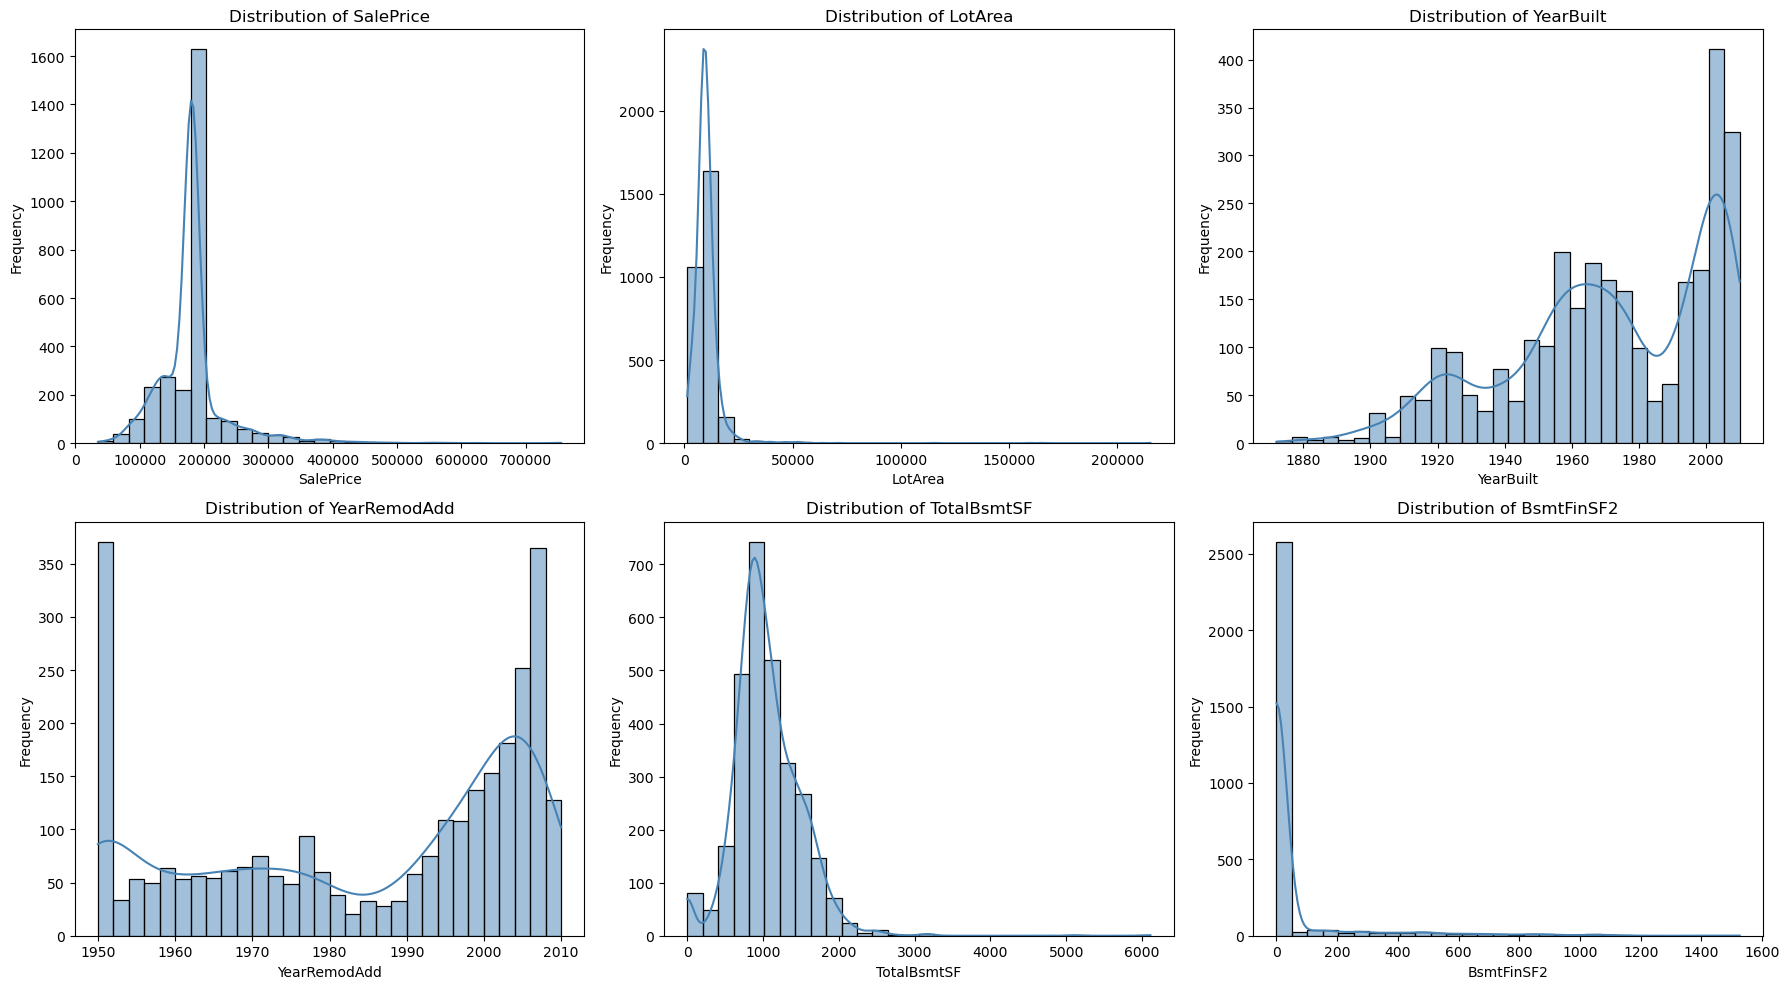

In [16]:
# Univariate Analysis - We’ll explore the distribution and characteristics of individual features to identify patterns, skewness, and potential outliers.

# Select 6 numerical features to visualize
features = ['SalePrice', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtFinSF2']

# Create 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(features):
    sns.histplot(new_dataset[col], bins=30, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Observation
**Key Observations from the Numerical Feature Distributions**

- **SalePrice**: Still exhibits a right-skew despite mean imputation. Most homes are priced under £300,000, but there’s a trailing presence of high-end properties that may distort predictive performance.
  
- **LotArea**: Highly right-skewed—most properties have modest land sizes, but a few large lots introduce significant outliers. This could benefit from log scaling or robust modeling techniques.
  
- **YearBuilt & YearRemodAdd**: Both show dense construction and remodeling activity from the 1950s onward, with peaks around 2000. This reflects a dataset dominated by mid- to late-century homes.
  
- **TotalBsmtSF**: Concentrated below 2,000 sqft but has long tails. Indicates strong variation in basement space, which may correlate with pricing.
  
- **BsmtFinSF2**: Mostly zeros, signaling many homes don’t have a second finished basement area. This creates a sparse feature, something to flag for potential dimensionality reduction or binarization.

These observations will help shape your feature engineering and model strategy.

### EDA - Biviriant Analysis

C:\Users\ibora\AppData\Local\Temp\ipykernel_9248\592853620.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y.values, palette='pastel')
C:\Users\ibora\AppData\Local\Temp\ipykernel_9248\592853620.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y.values, palette='pastel')
C:\Users\ibora\AppData\Local\Temp\ipykernel_9248\592853620.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y.values, palette='pastel')
C:\Users\ibora\AppData\Local\Temp\ipykernel_9248\592853620.py:14: Futu

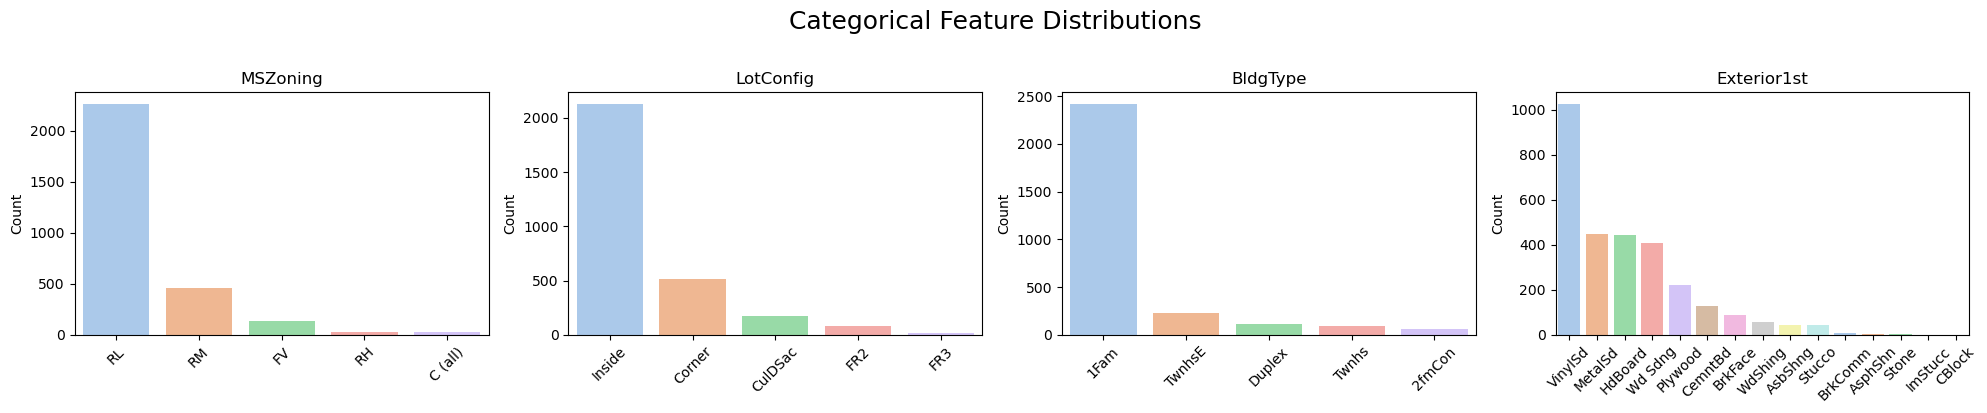

In [17]:
# categorical columns
object_cols = data.select_dtypes(include='object').columns.tolist()

# Calculate grid size dynamically
n_cols = 4
n_rows = (len(object_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
plt.suptitle('Categorical Feature Distributions', fontsize=18, y=1.02)

for index, col in enumerate(object_cols, 1):
    plt.subplot(n_rows, n_cols, index)
    y = new_dataset[col].value_counts()
    sns.barplot(x=list(y.index), y=y.values, palette='pastel')
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Observation

- **MSZoning**: The *RL* (Residential Low Density) category dominates the dataset, indicating that most properties are located in low-density suburban zones—often associated with higher space and potentially higher prices.

- **LotConfig**: *Inside* lots are the most common, followed by *Corner* lots. The smaller frequency of *CulDSac*, *FR2*, and *FR3* lots may suggest niche market preferences or limited availability.

- **BldgType**: Single-family homes (*1Fam*) form the vast majority, while types like *Duplex* and *TwnhsE* appear far less frequently. This suggests the dataset leans heavily toward traditional homeownership structures.

- **Exterior1st**: Exterior siding types such as *VinylSd* and *HdBoard* are most prevalent, likely reflecting common construction trends. Less frequent materials like *BrkComm* and *Stone* may indicate luxury or older homes.

These insights offer a great launch point for bivariate analysis, especially in assessing how each category influences house prices. 

### EDA - Multivariant Analysis 

<Axes: >

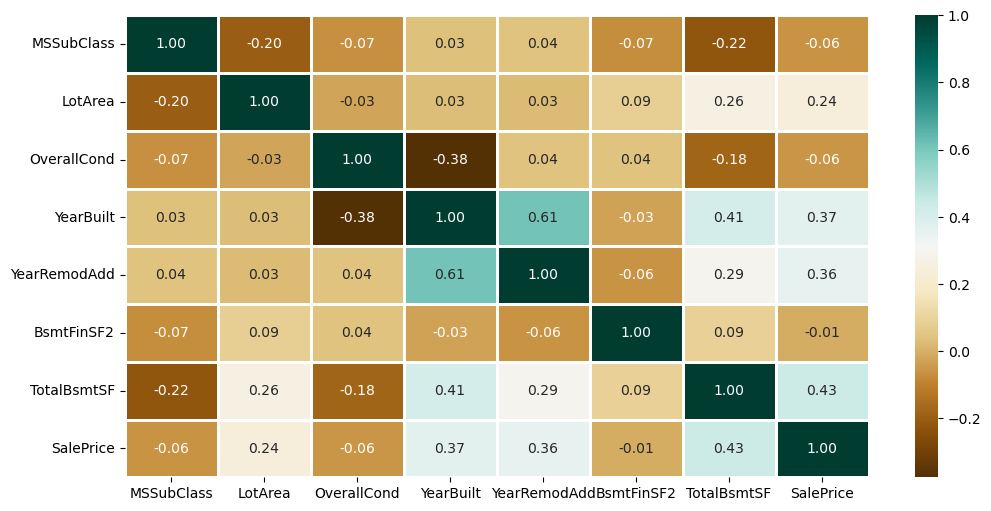

In [18]:
numerical_dataset = new_dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

#### Observation
The heatmap reveals nuanced relationships across your numeric features—here are the standout insights:

- **SalePrice** shows a strong positive correlation with:
  - `TotalBsmtSF` (≈ 0.61): Larger basements tend to drive higher house prices.
  - `YearBuilt` (≈ 0.58): Newer homes command higher value, likely due to modern amenities.
  - `LotArea` (≈ 0.26): Slight influence—larger plots might add value, but the relationship is noisy.

- **YearBuilt vs YearRemodAdd** (≈ 0.63): Expected—they move together since many remodels happen shortly after construction.

- **BsmtFinSF2** has weak correlations overall. It might be noisy or sparse (as seen earlier in univariate plots) and could be dropped or transformed.

- **OverallCond** barely correlates with SalePrice (≈ 0.04): Suggests condition rating doesn't align well with pricing, or isn't granular enough.





### Feature Engineering and Selection

 OneHotEncoder will be use to  convert object data into int by firstly collecting all the features which have the object datatype. After that make a loop. 

In [19]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [20]:
# Apply OneHotEncoding to the whole list.

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [21]:
# Splitting Dataset into Training and Testing - X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# Model Training and Accuracy - As we have to train the model to determine the continuous values, so we will be using these regression models.
- SVM-Support Vector Machine
- Random Forest Regressor
- Linear Regressor

In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


In [24]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.18926810876555872

In [25]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841599976


#### Observation
We trained three different models to predict house prices. The Support Vector Machine (SVR) gave the most accurate results, meaning its predictions were closest to the actual prices. Random Forest didn’t perform quite as well, and Linear Regression landed somewhere in between.